In [ ]:
# Mapbox Token: 
#cimgt.MapboxTiles("pk.eyJ1IjoibWF0dGZlbCIsImEiOiJjbDJrcGJkZ2YwMWR1M2pwbjJtNjBqbnc4In0.wxOBcerUls3bci-tGn_hIA", map_id='satellite-v9')

In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix}  -c conda-forge cartopy

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
import cartopy
print(cartopy.__version__)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display as display
import os, math, time
import cartopy.crs as ccrs
import cartopy 
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
import matplotlib.gridspec as gridspec

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread
import numpy as np

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return width*height

import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread

geoscents_home='/home/mattfel/geoscents/'

def basicFig(render, coords):
    my_dpi = 96
    plt.figure(figsize=(1530/my_dpi, 900/my_dpi), dpi=my_dpi, frameon=False)
    plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)

    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent(coords,  crs=ccrs.PlateCarree())
    ax.set_axis_off()

    # land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'none', facecolor = 'none')
    # ax.add_feature(land)

    coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
                                               facecolor='none')
    ax.add_feature(coastline)

    borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                               facecolor='none')
    ax.add_feature(borders, linewidth = 0.5, linestyle='-')

    dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
                                               facecolor='none')
    ax.add_feature(dispute, linewidth = 0.6, linestyle='-')



#     ax.stock_img()
    if (render == 'terrain'):
        # Create a Stamen terrain background instance.
        ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
        ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        terrain = cimgt.Stamen('terrain-background')
        ax.add_image(terrain, 6)
    elif (render == 'satellite'):
#         ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
#         ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        terrain = cimgt.GoogleTiles(style='satellite') # need cartopy 0.19 or 0.20 for cache=True)
        ax.add_image(terrain, 6)
    else:
        land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='coral', facecolor='coral')
        ax.add_feature(land_50m)
#         ax.add_feature(cfeature.RIVERS, alpha = 0.4, color = 'aqua')
        # Get cartopy features for plotting
        ax.add_feature(cfeature.LAKES, alpha = 0.4, color = 'aqua')
        rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
        ax.add_feature(rivers, facecolor='None', edgecolor='aqua', alpha = 0.4)

#         ax.add_feature(cfeature.LAND, color = 'coral')
#         ax.add_feature(cfeature.OCEAN, color = 'aqua')
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='aqua', facecolor='aqua'))

        borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                                   facecolor='none')
        ax.add_feature(borders, linewidth = 0.5, linestyle='-')

        dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
                                                   facecolor='none')
        ax.add_feature(dispute, linewidth = 0.6, linestyle='-')
        coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
                                               facecolor='none')
        ax.add_feature(coastline)

    return plt,ax

def classic(coords, name):      
    plt,ax = basicFig('classic', coords)
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',
                                               facecolor='none')
    ax.add_feature(states, linewidth = 0.1, linestyle='-')
    plt.savefig(geoscents_home + '/resources/maps/' + name + '_classic.png', transparent=True, pad_inches=0, bbox_inches='tight')
    img = Image.open(geoscents_home + '/resources/maps/' + name + '_classic.png')
    print(img)
    print("dims ok?")
    width_min = 1528
    width_max = 1532
    height_min = 898
    height_max = 902
    ok = img.size[0] > width_min and img.size[0] < width_max and img.size[1] > height_min and img.size[1] < height_max
    print(ok)
    if (img.size[0] < width_min):
        print("too short horizontally. Make wider")
    if (img.size[0] > width_max):
        print("too long horizontally. Make shorter")
    if (img.size[1] < height_min):
        print("too short vertically. Make taller")
    if (img.size[1] > height_max):
        print("too tall vertically. Make wider")
    return ok

def terrain(coords, name):
    plt,ax = basicFig("terrain", coords)
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',
                                               facecolor='none')
    ax.add_feature(states, linewidth = 0.1, linestyle='-')
    plt.savefig(geoscents_home + '/resources/maps/' + name + '_terrain.png', transparent=True, pad_inches=0, bbox_inches='tight')
    # plt.show()
    img = Image.open(geoscents_home + '/resources/maps/' + name + '_terrain.png')
    # Also save as name.png for data visualizer
    plt.savefig(geoscents_home + '/resources/maps/' + name + '.png', transparent=True, pad_inches=0, bbox_inches='tight')
    print(img)
    
def satellite(coords, name):
    plt,ax = basicFig('satellite', coords)
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',
                                               facecolor='none')
    ax.add_feature(states, linewidth = 0.25, linestyle='--')
#     plt.show()
    plt.savefig(geoscents_home + '/resources/maps/' + name + '_satellite.png', transparent=False, pad_inches=0, bbox_inches='tight')
    img = Image.open(geoscents_home + '/resources/maps/' + name + '_satellite.png')
    # Hack to get bigger image
#     resized_img = img.resize((1528, 900))
#     resized_img.save(name + "_satellite.png")
#     print(resized_img)

def basic_satellite(coords, name):
    # World
    plt,ax = basicFig('satellite', coords)
    # plt.show()
    plt.savefig(geoscents_home + '/resources/maps/' + name + '_satellite.png', transparent=True, pad_inches=0, bbox_inches='tight')


/opt/anaconda/bin/python
3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)
0.18.0


# Core maps

In [2]:
coords = [-180, 180, -56, 80.85]
name = "misc"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff7eed3cb80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
coords = [-180, 180, -65.3, 77.2]
name = "world"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

In [ ]:
coords = [-60, 82, -36.3, 41]
name = "africa"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

In [ ]:
coords = [-180, 180, -65.3, 77.2]
name = "world_easy"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

In [ ]:
coords = [-141, -43, 10, 56]
name = "us"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

In [ ]:
coords = [-36.3, 52, 35, 66.3]
name = "euro"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

In [ ]:
coords = [-140, 17, -56, 24.1]
name = "samerica"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

In [ ]:
coords = [25, 158, -1, 61.05]
name = "asia"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    basic_satellite(coords, name)

# Oceania (special because it crosses dateline)

In [ ]:
oceania_coords = [92, 252, -54.5, 28]

In [ ]:

def oceaniaFig(render = 'terrain', bounds = [69, 210, -57, 13.5]):
    my_dpi = 96
    f = plt.figure(figsize=(1530/my_dpi, 900/my_dpi), dpi=my_dpi, frameon=False)
    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[180 - bounds[0],bounds[1] - 180])
    plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)

    ax1 = f.add_subplot(spec[0],projection=ccrs.Mercator(central_longitude=0))
    coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',facecolor='none')
    ax1.add_feature(coastline)
    borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',facecolor='none')
    ax1.add_feature(borders, linewidth = 0.5, linestyle='-')
    dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',facecolor='none')
    ax1.add_feature(dispute, linewidth = 0.6, linestyle='-')
    if (render == 'terrain'):
        # Create a Stamen terrain background instance.
        ax1.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
        ax1.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        terrain = cimgt.Stamen('terrain-background')
        ax1.add_image(terrain, 5)
        ax1.outline_patch.set_edgecolor('#99B3CC')
#         ax1.set_facecolor('#99B3CC')
        f.gca().outline_patch.set_visible(True)
    elif (render == 'satellite'):
        terrain = cimgt.GoogleTiles(style='satellite') # need cartopy 0.19 or 0.20 for cache=True)
        ax1.add_image(terrain, 5)
        ax1.outline_patch.set_edgecolor('#162657')
    else:
        land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='coral', facecolor='coral')
        ax1.add_feature(land_50m)
        ax1.add_feature(cfeature.LAKES, alpha = 0.4, color = 'aqua')
        rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
        ax1.add_feature(rivers, facecolor='None', edgecolor='aqua', alpha = 0.4)
        ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='aqua', facecolor='aqua'))
        borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',facecolor='none')
        ax1.add_feature(borders, linewidth = 0.5, linestyle='-')
        dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',facecolor='none')
        ax1.add_feature(dispute, linewidth = 0.6, linestyle='-')
        coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',facecolor='none')
        ax1.add_feature(coastline)
        plt.gca().outline_patch.set_visible(False)
#         ax1.outline_patch.set_edgecolor('#00FFFF')
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',facecolor='none')
    ax1.add_feature(states, linewidth = 0.1, linestyle='-')
    ax1.set_extent([bounds[0], 180, bounds[2], bounds[3]],  crs=ccrs.PlateCarree())
            
    ax2 = f.add_subplot(spec[1],projection=ccrs.Mercator(central_longitude=0))
    coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',facecolor='none')
    ax2.add_feature(coastline)
    borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',facecolor='none')
    ax2.add_feature(borders, linewidth = 0.5, linestyle='-')
    dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',facecolor='none')
    ax2.add_feature(dispute, linewidth = 0.6, linestyle='-')
    if (render == 'terrain'):
        # Create a Stamen terrain background instance.
        ax2.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
        ax2.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        terrain = cimgt.Stamen('terrain-background')
        ax2.add_image(terrain, 6)
        ax2.outline_patch.set_edgecolor('#99B3CC')
#         ax2.set_facecolor('#99B3CC')
    elif (render == 'satellite'):
        terrain = cimgt.GoogleTiles(style='satellite')
        ax2.add_image(terrain, 6)
        ax2.outline_patch.set_edgecolor('#162657')
        f.patch.set_facecolor('#162657')
    else:
        land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',edgecolor='coral', facecolor='coral')
        ax2.add_feature(land_50m)
        ax2.add_feature(cfeature.LAKES, alpha = 0.4, color = 'aqua')
        rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
        ax2.add_feature(rivers, facecolor='None', edgecolor='aqua', alpha = 0.4)
        ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='aqua', facecolor='aqua'))
        borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',facecolor='none')
        ax2.add_feature(borders, linewidth = 0.5, linestyle='-')
        dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',facecolor='none')
        ax2.add_feature(dispute, linewidth = 0.6, linestyle='-')
        coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',facecolor='none')
        ax2.add_feature(coastline)
        plt.gca().outline_patch.set_visible(False)
#         ax2.outline_patch.set_edgecolor('#00FFFF')
#         ax2.set_facecolor('#00FFFF')
#         f.patch.set_facecolor('#00FFFF')
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',facecolor='none')
    ax2.add_feature(states, linewidth = 0.1, linestyle='-')
    ax2.set_extent([-180, bounds[1] - 360, bounds[2], bounds[3]],  crs=ccrs.PlateCarree())
    
    
    plt.subplots_adjust(wspace=-0.00001)
    plt.savefig(geoscents_home + '/resources/maps/' + 'oceania_' + render + '.png')
#     print(Image.open('oceania_' + render + '.png').size)
    



In [ ]:
# Oceania          
oceaniaFig(render = 'classic', bounds = oceania_coords)

In [ ]:
oceaniaFig(render = 'terrain', bounds = oceania_coords)

In [ ]:
oceaniaFig(render = 'satellite', bounds = oceania_coords)

# Countries

In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
import cartopy
print(cartopy.__version__)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display as display
import os, math, time
import cartopy.crs as ccrs
import cartopy 
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
import matplotlib.gridspec as gridspec

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread
import numpy as np

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return width*height

import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread
# my_dpi = 96
# plt.figure(figsize=(1530/my_dpi, 900/my_dpi), dpi=my_dpi, frameon=False)
# stamen_terrain = cimgt.Stamen('terrain-background')
# ax = plt.axes(projection=ccrs.Mercator())
# ax.add_image(stamen_terrain, 7)
# ax.set_axis_off()
# plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)
# coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
#                                            facecolor='none')
# ax.add_feature(coastline)

# borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
#                                            facecolor='none')
# ax.add_feature(borders, linewidth = 0.5, linestyle='-')

# dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
#                                            facecolor='none')
# ax.add_feature(dispute, linewidth = 0.6, linestyle='-')

# # lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')
# # ax.add_feature(lakes, alpha = 0.8)

# # rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m')
# # ax.add_feature(rivers, alpha = 0.8)

# ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
# ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)

def basicFig(render, coords):
    my_dpi = 96
    plt.figure(figsize=(1530/my_dpi, 900/my_dpi), dpi=my_dpi, frameon=False)
    plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)

    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent(coords,  crs=ccrs.PlateCarree())
    ax.set_axis_off()

    # land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'none', facecolor = 'none')
    # ax.add_feature(land)

    coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '10m', edgecolor='black',
                                               facecolor='none')
    ax.add_feature(coastline)

    borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                               facecolor='none')
    ax.add_feature(borders, linewidth = 0.5, linestyle='-')




#     ax.stock_img()
    if (render == 'terrain'):
        # Create a Stamen terrain background instance.
        ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
        ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        terrain = cimgt.Stamen('terrain')
        ax.add_image(terrain, 17)
    elif (render == 'satellite'):
#         ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
#         ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        terrain = cimgt.GoogleTiles(style='satellite') # need cartopy 0.19 or 0.20 for cache=True)
        ax.add_image(terrain, 17)
    else:
        land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='coral', facecolor='coral')
        ax.add_feature(land_50m)
#         ax.add_feature(cfeature.RIVERS, alpha = 0.4, color = 'aqua')
        # Get cartopy features for plotting
        ax.add_feature(cfeature.LAKES, alpha = 0.4, color = 'aqua')
        rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
        ax.add_feature(rivers, facecolor='None', edgecolor='aqua', alpha = 0.4)

#         ax.add_feature(cfeature.LAND, color = 'coral')
#         ax.add_feature(cfeature.OCEAN, color = 'aqua')
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='aqua', facecolor='aqua'))

        borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                                   facecolor='none')
        ax.add_feature(borders, linewidth = 0.5, linestyle='-')

        dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
                                                   facecolor='none')
        ax.add_feature(dispute, linewidth = 0.6, linestyle='-')
        coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
                                               facecolor='none')
        ax.add_feature(coastline)

    return plt,ax

def classic(coords, name):      
    plt,ax = basicFig('classic', coords)
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',
                                               facecolor='none')
    ax.add_feature(states, linewidth = 0.1, linestyle='-')
    plt.savefig(name + '_classic.png', transparent=True, pad_inches=0, bbox_inches='tight')
    img = Image.open(name + '_classic.png')
    print(img)
    print("dims ok?")
    width_min = 1528
    width_max = 1532
    height_min = 898
    height_max = 902
    ok = img.size[0] > width_min and img.size[0] < width_max and img.size[1] > height_min and img.size[1] < height_max
    print(ok)
    if (img.size[0] < width_min):
        print("too short horizontally. Make wider")
    if (img.size[0] > width_max):
        print("too long horizontally. Make shorter")
    if (img.size[1] < height_min):
        print("too short vertically. Make taller")
    if (img.size[1] > height_max):
        print("too tall vertically. Make wider")
    return ok

def terrain(coords, name):
    plt,ax = basicFig("terrain", coords)
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '110m', edgecolor='darkblue',
                                               facecolor='none')
    ax.add_feature(states, linewidth = 0.1, linestyle='-')
    plt.savefig(name + '_terrain.png', transparent=True, pad_inches=0, bbox_inches='tight')
    # plt.show()
    img = Image.open(name + '_terrain.png')
    # Also save as name.png for data visualizer
    plt.savefig(name + '.png', transparent=True, pad_inches=0, bbox_inches='tight')
    print(img)
    
def satellite(coords, name):
    plt,ax = basicFig('satellite', coords)
    states = cfeature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='darkblue',
                                               facecolor='none')
    ax.add_feature(states, linewidth = 0.25, linestyle='--')
#     plt.show()
    plt.savefig(name + '_satellite.png', transparent=False, pad_inches=0, bbox_inches='tight')
    img = Image.open(name + '_satellite.png')
    # Hack to get bigger image
#     resized_img = img.resize((1528, 900))
#     resized_img.save(name + "_satellite.png")
#     print(resized_img)

def basic_satellite(coords, name):
    # World
    plt,ax = basicFig('satellite', coords)
    # plt.show()
    plt.savefig(name + '_satellite.png', transparent=True, pad_inches=0, bbox_inches='tight')


In [ ]:
coords = [12.444, 12.46, 41.899, 41.908]
name = "vaticancity"
# ok = classic(coords, name)
# if (ok):
terrain(coords, name)
satellite(coords, name)

In [ ]:
coords = [-25, 10, 20.03, 38]
name = "morocco"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [3.53, 41, -14, 8]
name = "democraticrepublicofthecongo"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [9, 37, -35.51, -21]
name = "southafrica"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-2.48, 19, 3.5, 16]
name = "nigeria"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-91.7, -17, -34, 8]
name = "brazil"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-120, -80, 13.61, 35]
name = "mexico"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [50, 107.3, 6, 37]
name = "india"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1530x899 at 0x7FF7EC884310>
dims ok?
True
<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1530x899 at 0x7FF7EBF26EB0>


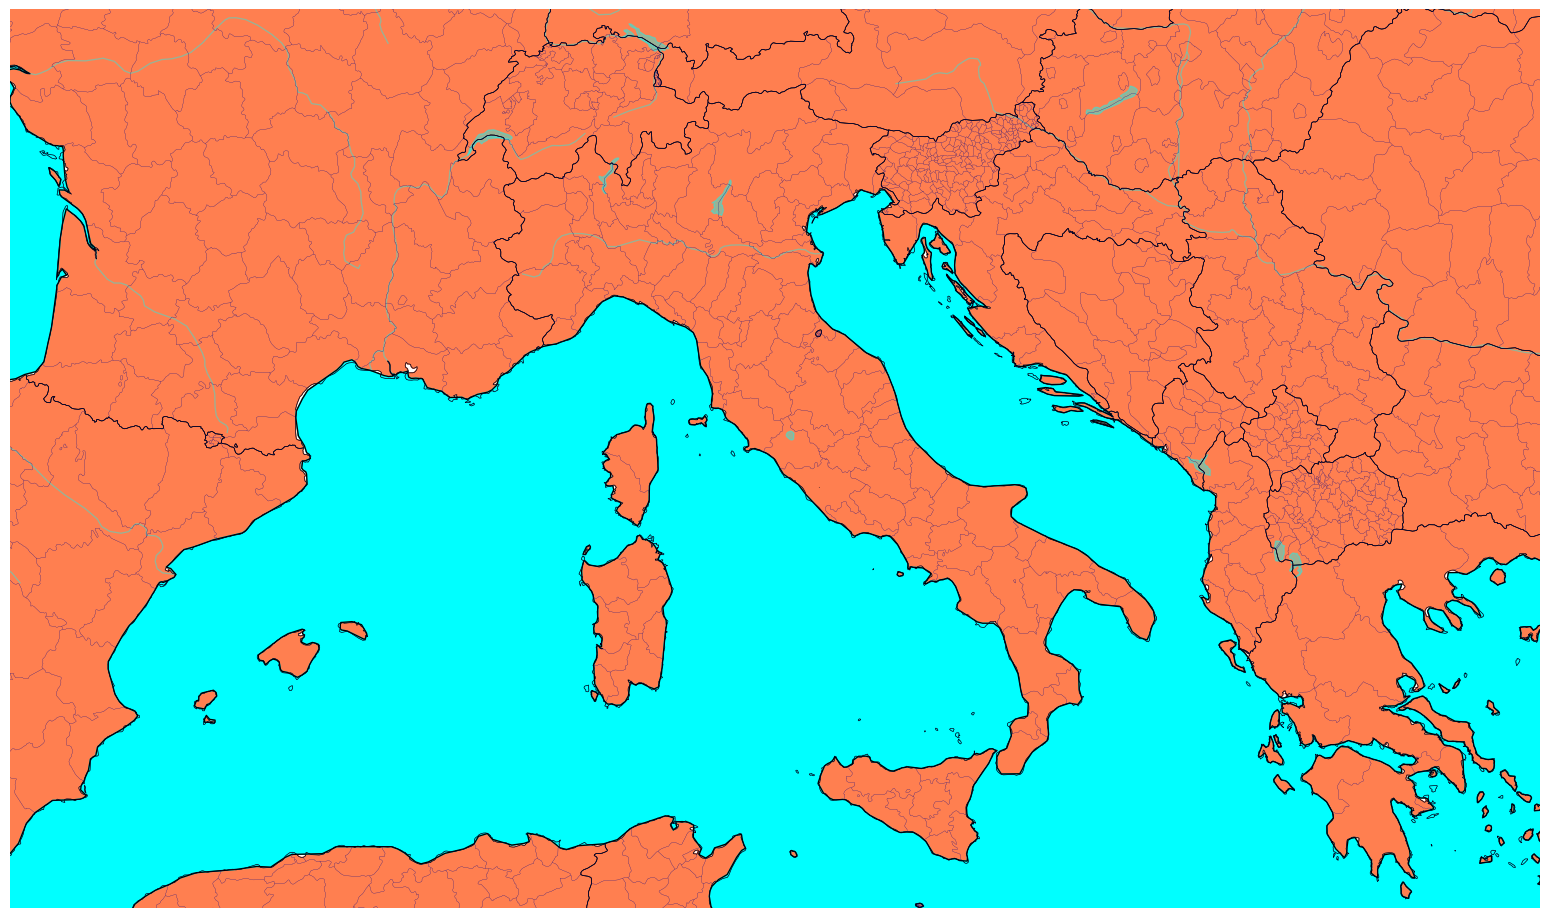

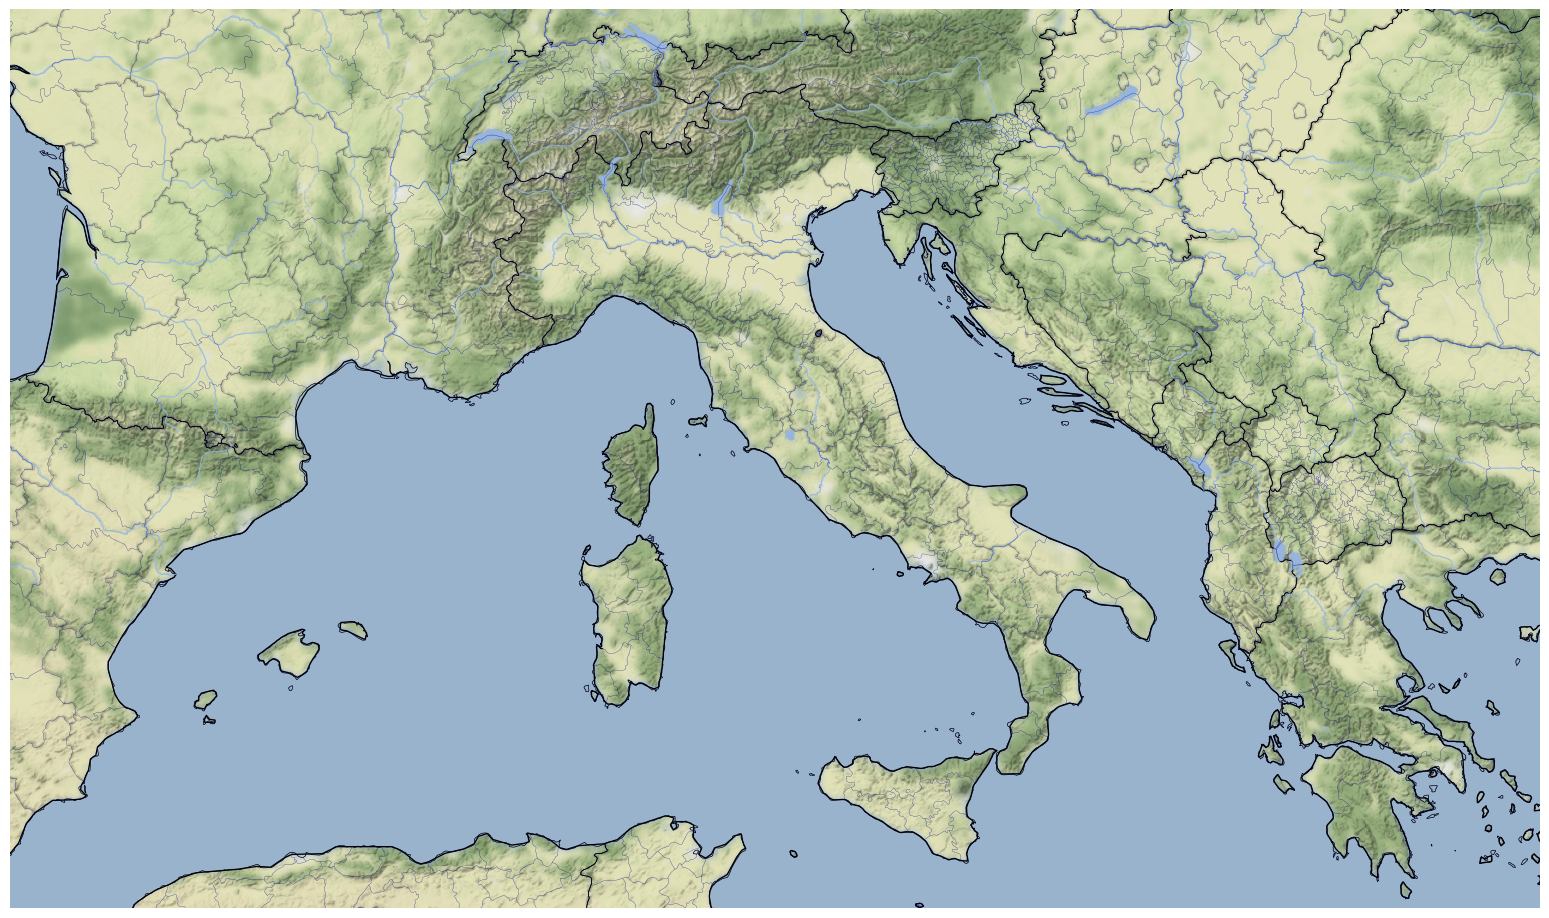

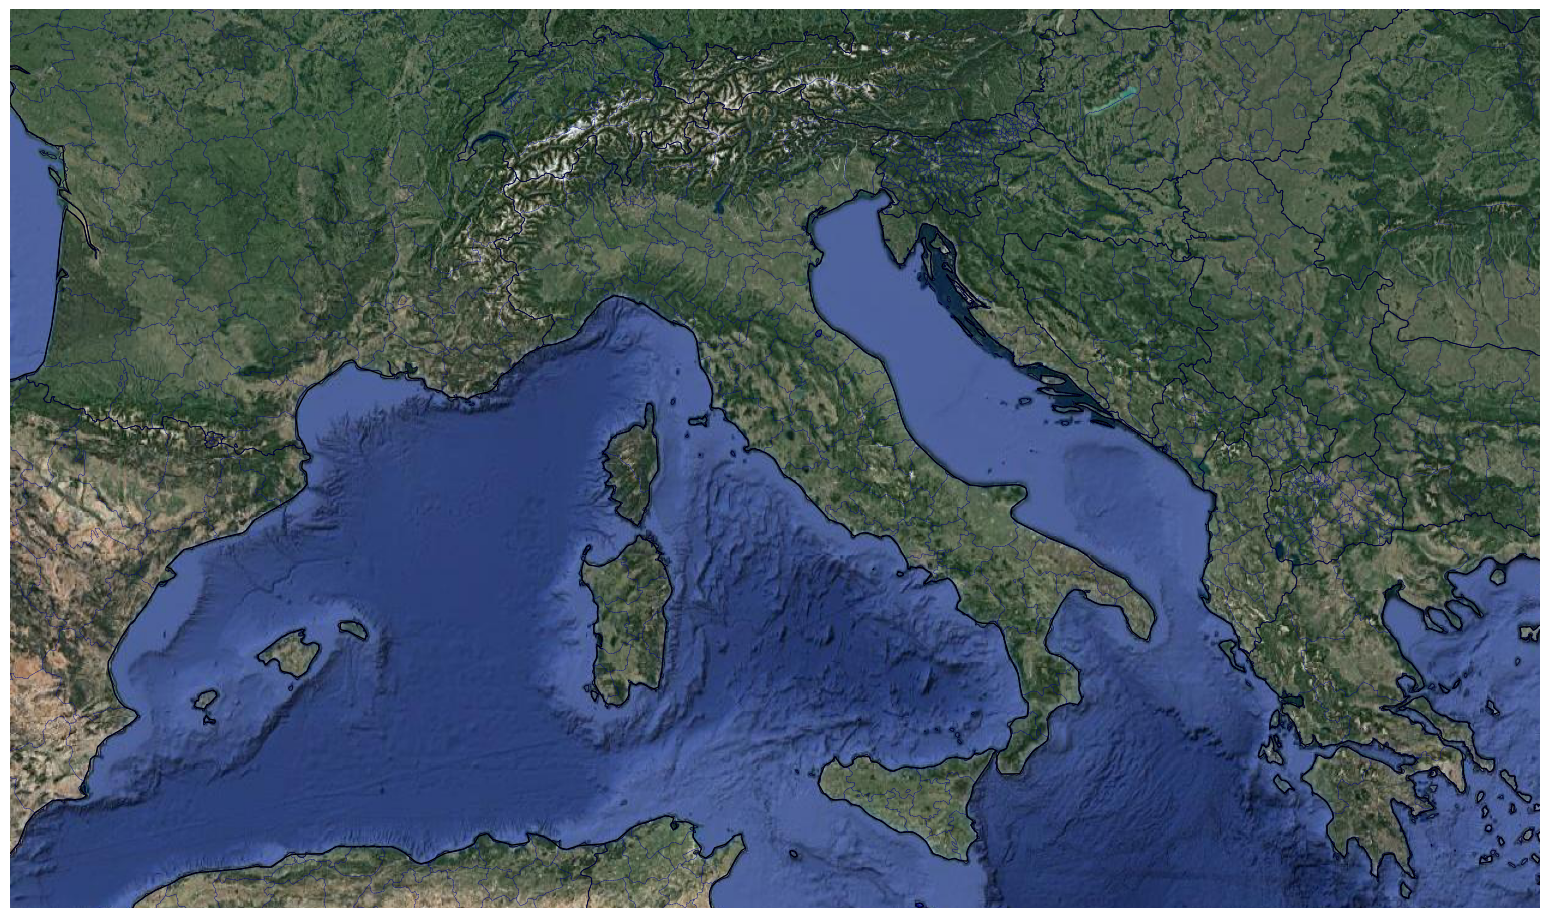

In [3]:
coords = [-2.1, 25.4, 36, 48]
name = "italy"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-19.55, 15, 49.5, 61]
name = "unitedkingdom"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-2.1, 23, 46.8, 56]
name = "germany"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-10.2, 17, 41, 52]
name = "france"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-130, -60, 22, 53.7]
name = "unitedstates"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [36, 72.6, 24, 42]
name = "iran"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [62, 148, 16.85, 56]
name = "china"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-14.18, 8, 35, 45]
name = "spain"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [84.5, 151, -23.5, 15]
name = "indonesia"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [16.5, 41.7, 20.81, 34]
name = "egypt"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-92, -55, -19.5, 2]
name = "peru"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [17.4, 45.3, 43.18, 54]
name = "ukraine"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-102, -20, -56.5, -20]
name = "argentina"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [97, 170, -45.5, -8]
name = "australia"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [-152.1, -40, 38, 72.5]
name = "canada"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [110, 164.5, 23.5, 49]
name = "japan"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [30, 49, 5.9, -5.33]
name = "kenya"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

In [ ]:
coords = [18.8, 33.7, 49, 42.9]
name = "romania"
ok = classic(coords, name)
if (ok):
    terrain(coords, name)
    satellite(coords, name)

# Antarctica

In [ ]:
# Antarctica
my_dpi=96
f = plt.figure(figsize=(1530/my_dpi, 900/my_dpi), dpi=my_dpi, frameon=False)
ax1 = plt.axes(projection=ccrs.SouthPolarStereo())

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)

ax1.gridlines()



plt.show()

# Spinning Globe

In [ ]:
i = 0
for lon_viewing_angle in np.arange(-180, 180, 3):
        fig = plt.figure(figsize=(3,3))
        #print(lon_viewing_angle)
        # set perspective angle
        lat_viewing_angle = 40
        #lon_viewing_angle = -180

        # define color maps for water and land
        ocean_map = (plt.get_cmap('ocean'))(210)
        cmap = plt.get_cmap('gist_earth')

        # call the basemap and use orthographic projection at viewing angle
        m = Basemap(projection='ortho',
                  lat_0=lat_viewing_angle, lon_0=lon_viewing_angle)

        # coastlines, map boundary, fill continents/water, fill ocean, draw countries
        m.drawcoastlines()
        m.drawmapboundary(fill_color=ocean_map)
        m.fillcontinents(color='coral',lake_color=ocean_map)
#       m.drawcountries()

        # latitude/longitude line vectors
        lat_line_range = [-90,90]
        lat_lines = 8
        lat_line_count = (lat_line_range[1]-lat_line_range[0])/lat_lines

        merid_range = [-180,180]
        merid_lines = 8
        merid_count = (merid_range[1]-merid_range[0])/merid_lines

        m.drawparallels(np.arange(lat_line_range[0],lat_line_range[1],lat_line_count))
        m.drawmeridians(np.arange(merid_range[0],merid_range[1],merid_count))

        # save figure at 150 dpi and show it
        plt.savefig('globe_classic/view' + str(i).zfill(3) + '.png',dpi=150,transparent=True)
        plt.show()
        plt.clf()
        i = i + 1;


In [ ]:
from PIL import Image
import IPython.display as display
import os, math, time

max_frames_row = 1000
frames = []
tile_width = 0
tile_height = 0

spritesheet_width = 0
spritesheet_height = 0

files = os.listdir("globe/")
files.sort()
print(files)

for current_file in files :
    try:
        with Image.open("globe_classic/" + current_file) as im :
            frames.append(im.getdata())
    except:
        print(current_file + " is not a valid image")

tile_width = frames[0].size[0]
tile_height = frames[0].size[1]

if len(frames) > max_frames_row :
    spritesheet_width = tile_width * max_frames_row
    required_rows = math.ceil(len(frames)/max_frames_row)
    spritesheet_height = tile_height * required_rows
else:
    spritesheet_width = tile_width*len(frames)
    spritesheet_height = tile_height

print(spritesheet_height)
print(spritesheet_width)

spritesheet = Image.new("RGBA",(int(spritesheet_width), int(spritesheet_height)))

for current_frame in frames :
    top = tile_height * math.floor((frames.index(current_frame))/max_frames_row)
    left = tile_width * (frames.index(current_frame) % max_frames_row)
    bottom = top + tile_height
    right = left + tile_width

    box = (left,top,right,bottom)
    box = [int(i) for i in box]
    cut_frame = current_frame.crop((0,0,tile_width,tile_height))

    spritesheet.paste(cut_frame, box)

display.display(spritesheet)
spritesheet.save("spritesheet_classic.png", "PNG")


# Favicon

In [ ]:
lon_viewing_angle=0
fig = plt.figure(figsize=(0.32,0.32))
#print(lon_viewing_angle)
# set perspective angle
lat_viewing_angle = 40
#lon_viewing_angle = -180

# define color maps for water and land
ocean_map = (plt.get_cmap('ocean'))(210)
cmap = plt.get_cmap('gist_earth')

# call the basemap and use orthographic projection at viewing angle
m = Basemap(projection='ortho',
          lat_0=lat_viewing_angle, lon_0=lon_viewing_angle)

# coastlines, map boundary, fill continents/water, fill ocean, draw countries
#m.drawcoastlines()
m.drawmapboundary(fill_color=ocean_map)
m.fillcontinents(color=cmap(200),lake_color=ocean_map)
#m.drawcountries()

# latitude/longitude line vectors
lat_line_range = [-90,90]
lat_lines = 3
lat_line_count = (lat_line_range[1]-lat_line_range[0])/lat_lines

merid_range = [-180,180]
merid_lines = 3
merid_count = (merid_range[1]-merid_range[0])/merid_lines

#m.drawparallels(np.arange(lat_line_range[0],lat_line_range[1],lat_line_count))
#m.drawmeridians(np.arange(merid_range[0],merid_range[1],merid_count))

# save figure at 150 dpi and show it
plt.savefig('favicon.png',dpi=150,transparent=True)
plt.show()
plt.clf()


# OG Image

In [ ]:
lon_viewing_angle=0
fig = plt.figure(figsize=(5,5))
#print(lon_viewing_angle)
# set perspective angle
lat_viewing_angle = 40
#lon_viewing_angle = -180

# define color maps for water and land
ocean_map = (plt.get_cmap('ocean'))(210)
cmap = plt.get_cmap('gist_earth')

# call the basemap and use orthographic projection at viewing angle
m = Basemap(projection='ortho',
          lat_0=lat_viewing_angle, lon_0=lon_viewing_angle)

# coastlines, map boundary, fill continents/water, fill ocean, draw countries
#m.drawcoastlines()
m.drawmapboundary(fill_color=ocean_map)
m.fillcontinents(color=cmap(200),lake_color=ocean_map)
#m.drawcountries()

# latitude/longitude line vectors
lat_line_range = [-90,90]
lat_lines = 3
lat_line_count = (lat_line_range[1]-lat_line_range[0])/lat_lines

merid_range = [-180,180]
merid_lines = 3
merid_count = (merid_range[1]-merid_range[0])/merid_lines

#m.drawparallels(np.arange(lat_line_range[0],lat_line_range[1],lat_line_count))
#m.drawmeridians(np.arange(merid_range[0],merid_range[1],merid_count))

# save figure at 150 dpi and show it
plt.savefig('ogimage.png',dpi=500,transparent=True)
plt.show()
plt.clf()

# Spinning Globe Terrain

In [ ]:
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread
import numpy as np

stamen = True
start_angle = 81
i = int((start_angle + 180) / 3)
for lon_viewing_angle in np.arange(start_angle, 180, 3):
        print(lon_viewing_angle)

        plt.figure(figsize=(3,3), dpi=150, frameon=False)
#         plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)

        ax = plt.axes(projection=ccrs.Orthographic(central_longitude=lon_viewing_angle, central_latitude=40))
        ax.set_axis_off()

        # land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'none', facecolor = 'none')
        # ax.add_feature(land)

        coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
                                                   facecolor='none')
        ax.add_feature(coastline)

        borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                                   facecolor='none')
        ax.add_feature(borders, linewidth = 0.5, linestyle='-')

#         dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
#                                                    facecolor='none')
#         ax.add_feature(dispute, linewidth = 0.6, linestyle='-')

        # lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')
        # ax.add_feature(lakes, alpha = 0.8)

        # rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m')
        # ax.add_feature(rivers, alpha = 0.8)

        ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
        ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', linewidth=0.2, color='grey')

    #     ax.stock_img()
        if (stamen):
            # Create a Stamen terrain background instance.
            terrain = cimgt.Stamen('terrain-background')
        else:
            terrain = cimgt.GoogleTiles(style='satellite') # need cartopy 0.19 or 0.20 for cache=True)
        ax.add_image(terrain, 1)

        # save figure at 150 dpi and show it
        if (stamen): sfx = '_terrain'
        else: sfx = '_satellite'
        plt.savefig('globe' + sfx + '/view' + str(i).zfill(3) + '.png',dpi=150,transparent=True)
        plt.close()
#         plt.show()
#         plt.clf()
        i = i + 1;

from PIL import Image
import IPython.display as display
import os, math, time
max_frames_row = 1000
frames = []
tile_width = 0
tile_height = 0

spritesheet_width = 0
spritesheet_height = 0

files = os.listdir("globe/")
files.sort()
print(files)

for current_file in files :
    try:
        with Image.open("globe" + sfx + "/" + current_file) as im :
            frames.append(im.getdata())
    except:
        print(current_file + " is not a valid image")

tile_width = frames[0].size[0]
tile_height = frames[0].size[1]

if len(frames) > max_frames_row :
    spritesheet_width = tile_width * max_frames_row
    required_rows = math.ceil(len(frames)/max_frames_row)
    spritesheet_height = tile_height * required_rows
else:
    spritesheet_width = tile_width*len(frames)
    spritesheet_height = tile_height

print(spritesheet_height)
print(spritesheet_width)

spritesheet = Image.new("RGBA",(int(spritesheet_width), int(spritesheet_height)))

for current_frame in frames :
    top = tile_height * math.floor((frames.index(current_frame))/max_frames_row)
    left = tile_width * (frames.index(current_frame) % max_frames_row)
    bottom = top + tile_height
    right = left + tile_width

    box = (left,top,right,bottom)
    box = [int(i) for i in box]
    cut_frame = current_frame.crop((0,0,tile_width,tile_height))

    spritesheet.paste(cut_frame, box)

display.display(spritesheet)
spritesheet.save("spritesheet" + sfx + ".png", "PNG")


# Spinning Globe Satellite

In [ ]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread
import numpy as np

stamen = False
start_angle = 177
i = int((start_angle + 180) / 3)
for lon_viewing_angle in np.arange(start_angle, 180, 3):
        print(lon_viewing_angle)

        plt.figure(figsize=(3,3), dpi=150, frameon=False)
#         plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)

        ax = plt.axes(projection=ccrs.Orthographic(central_longitude=lon_viewing_angle, central_latitude=40))
        ax.set_axis_off()

        # land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'none', facecolor = 'none')
        # ax.add_feature(land)

        coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
                                                   facecolor='none')
        ax.add_feature(coastline)

        borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                                   facecolor='none')
        ax.add_feature(borders, linewidth = 0.5, linestyle='-')

#         dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
#                                                    facecolor='none')
#         ax.add_feature(dispute, linewidth = 0.6, linestyle='-')

        # lakes = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')
        # ax.add_feature(lakes, alpha = 0.8)

        # rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m')
        # ax.add_feature(rivers, alpha = 0.8)

#         ax.add_feature(cartopy.feature.RIVERS, alpha = 0.8)
#         ax.add_feature(cartopy.feature.LAKES, alpha = 0.8)
        ax.gridlines(crs=ccrs.PlateCarree(), linestyle='--', linewidth=0.2, color='grey')

    #     ax.stock_img()
        if (stamen):
            # Create a Stamen terrain background instance.
            terrain = cimgt.Stamen('terrain-background')
        else:
            terrain = cimgt.GoogleTiles(style='satellite') # need cartopy 0.19 or 0.20 for cache=True)
        ax.add_image(terrain, 1)

        # save figure at 150 dpi and show it
        if (stamen): sfx = '_terrain'
        else: sfx = '_satellite'
        plt.savefig('globe' + sfx + '/view' + str(i).zfill(3) + '.png',dpi=150,transparent=True)
        plt.close()
#         plt.show()
#         plt.clf()
        i = i + 1;

from PIL import Image
import IPython.display as display
import os, math, time
max_frames_row = 1000
frames = []
tile_width = 0
tile_height = 0

spritesheet_width = 0
spritesheet_height = 0

files = os.listdir("globe/")
files.sort()
print(files)

for current_file in files :
    try:
        with Image.open("globe" + sfx + "/" + current_file) as im :
            frames.append(im.getdata())
    except:
        print(current_file + " is not a valid image")

tile_width = frames[0].size[0]
tile_height = frames[0].size[1]

if len(frames) > max_frames_row :
    spritesheet_width = tile_width * max_frames_row
    required_rows = math.ceil(len(frames)/max_frames_row)
    spritesheet_height = tile_height * required_rows
else:
    spritesheet_width = tile_width*len(frames)
    spritesheet_height = tile_height

print(spritesheet_height)
print(spritesheet_width)

spritesheet = Image.new("RGBA",(int(spritesheet_width), int(spritesheet_height)))

for current_frame in frames :
    top = tile_height * math.floor((frames.index(current_frame))/max_frames_row)
    left = tile_width * (frames.index(current_frame) % max_frames_row)
    bottom = top + tile_height
    right = left + tile_width

    box = (left,top,right,bottom)
    box = [int(i) for i in box]
    cut_frame = current_frame.crop((0,0,tile_width,tile_height))

    spritesheet.paste(cut_frame, box)

display.display(spritesheet)
spritesheet.save("spritesheet" + sfx + ".png", "PNG")


In [ ]:
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import os
%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.io.img_tiles as cimgt

from matplotlib.image import imread

my_dpi = 96
plt.figure(figsize=(1530/my_dpi, 900/my_dpi), dpi=my_dpi, frameon=False)
plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0)

ax = plt.axes(projection=ccrs.Mercator(central_longitude=0))
ax.set_axis_off()

# land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor = 'none', facecolor = 'none')
# ax.add_feature(land)

coastline = cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='black',
                                           facecolor='none')
ax.add_feature(coastline)

borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '10m', edgecolor='black',
                                           facecolor='none')
ax.add_feature(borders, linewidth = 0.5, linestyle='-')

dispute = cfeature.NaturalEarthFeature('cultural', 'admin_0_breakaway_disputed_areas', '50m', edgecolor='red',
                                           facecolor='none')
ax.add_feature(dispute, linewidth = 0.6, linestyle='-')

terrain = cimgt.GoogleTiles(style='satellite') # need cartopy 0.19 or 0.20 for cache=True)
ax.add_image(terrain, 2)
plt.show()

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix}  -c conda-forge gmplot

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


def main():
    # Create a Stamen Terrain instance.
    #stamen_terrain = cimgt.StamenTerrain()
    stamen_terrain = cimgt.GoogleTiles(style='satellite')

    # Create a GeoAxes in the tile's projection.
    ax = plt.axes(projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([0, 1, 0, 1])

    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 6)

    # Add a marker for the Eyjafjallajökull volcano.
    plt.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
             alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    plt.show()


if __name__ == '__main__':
    main()